In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Load Dataset
Load the cleaned and feature-engineered dataset for analysis.

In [2]:
# Load Cleaned Dataset

data_file = "data/cleaned/india_aq_cleaned_features.csv"

if os.path.exists(data_file):
    df = pd.read_csv(data_file, parse_dates=['datetime_utc', 'datetime_ist'])
    print(f"✅ Dataset loaded: {len(df):,} records")
    print(f"   Columns: {len(df.columns)}")
    print(f"   Unique locations: {df['location_id'].nunique()}")
else:
    print(f"❌ File not found: {data_file}")
    print("Run the data_cleaning_feature_engineering.ipynb first!")

✅ Dataset loaded: 106,369 records
   Columns: 84
   Unique locations: 49


## 2. Dataset Overview
Basic information about the dataset structure and data types.

In [3]:
# Dataset Overview

print("="*70)
print("DATASET OVERVIEW")
print("="*70)

print(f"\n📊 Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"📅 Date Range: {df['date'].min()} to {df['date'].max()}")
print(f"📍 Locations: {df['location_id'].nunique()} unique monitoring stations")
print(f"🗺️ States: {df['state'].nunique()} states")

print("\n" + "-"*50)
print("Data Types:")
print("-"*50)
print(df.dtypes)

print("\n" + "-"*50)
print("First 5 Rows:")
print("-"*50)
print(df.head())

DATASET OVERVIEW

📊 Shape: 106,369 rows × 84 columns
📅 Date Range: 2025-11-08 to 2025-12-08
📍 Locations: 49 unique monitoring stations
🗺️ States: 19 states

--------------------------------------------------
Data Types:
--------------------------------------------------
state                     object
district                  object
location_id                int64
location_name             object
latitude                 float64
                          ...   
o3_scaled                float64
temperature_scaled       float64
humidity_scaled          float64
wind_speed_scaled        float64
wind_direction_scaled    float64
Length: 84, dtype: object

--------------------------------------------------
First 5 Rows:
--------------------------------------------------
            state  district  location_id               location_name  \
0  Andhra Pradesh  Tirupati         5649  Tirumala, Tirupati - APPCB   
1  Andhra Pradesh  Tirupati         5649  Tirumala, Tirupati - APPCB   
2  Andh

## 3. Statistical Summary
**Insight**: Understand the central tendency, spread, and range of all numeric features.

In [4]:
# Statistical Summary

print("="*70)
print("STATISTICAL SUMMARY")
print("="*70)

# Pollutant statistics
pollutants = ['pm25', 'pm10', 'no2', 'co', 'so2', 'o3']
pollutants = [col for col in pollutants if col in df.columns]

print("\n📊 Pollutant Statistics:")
print(df[pollutants].describe().round(2))

# Weather statistics
weather = ['temperature', 'humidity', 'wind_speed', 'wind_direction']
weather = [col for col in weather if col in df.columns]

print("\n🌡️ Weather Statistics:")
print(df[weather].describe().round(2))

STATISTICAL SUMMARY

📊 Pollutant Statistics:
            pm25       pm10        no2         co        so2         o3
count  106369.00  106369.00  106369.00  106369.00  106369.00  106369.00
mean       62.17     115.39      20.93       0.78      14.35      29.18
std       111.54      80.73      23.47       0.55      15.70      32.04
min         0.00       0.00       0.00       0.00       0.00       0.00
25%        29.68      63.01       5.88       0.40       5.11       9.30
50%        51.82     101.67      14.30       0.70      10.20      21.87
75%        77.34     147.54      25.36       1.04      17.42      37.70
max     13232.17     843.60     304.72       2.98     179.60    2383.00

🌡️ Weather Statistics:
       temperature   humidity  wind_speed  wind_direction
count    106369.00  106369.00   106369.00       106369.00
mean         20.84      62.26        3.83          169.41
std           6.87      24.74       15.43           94.49
min         -52.00     -29.00       -0.45          

## 4. Missing Value Analysis
**Insight**: Check data completeness after cleaning.

MISSING VALUE ANALYSIS

Columns with missing values:
                         Missing Count  Missing %
power_plants_distance_m          87217      81.99
agricultural_distance_m          72965      68.60
dump_sites_distance_m            65727      61.79
commercial_distance_m            47099      44.28
industrial_distance_m            30196      28.39
residential_distance_m           17496      16.45


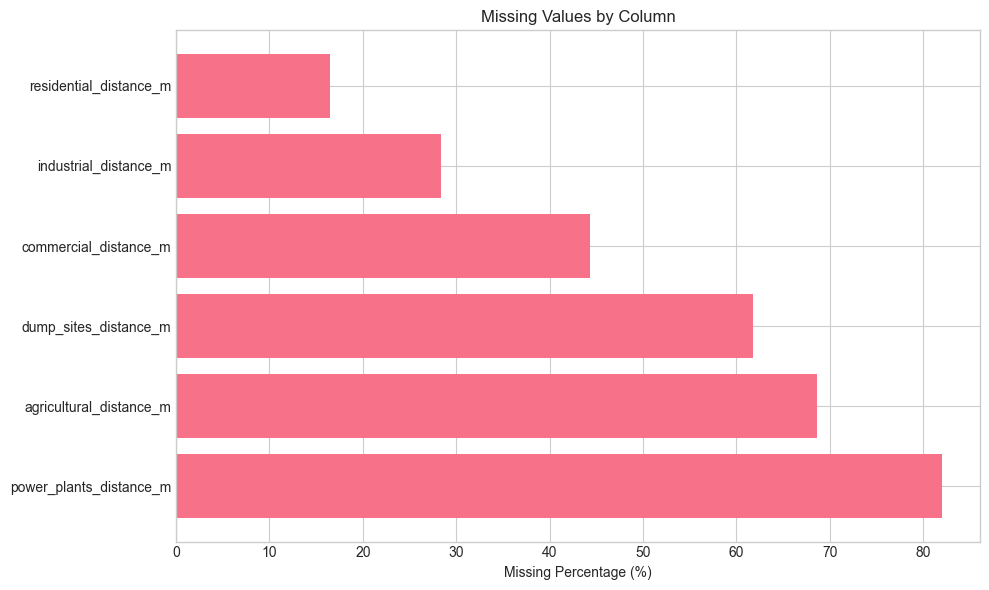

In [5]:
# Missing Value Analysis

print("="*70)
print("MISSING VALUE ANALYSIS")
print("="*70)

missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct
}).sort_values('Missing Count', ascending=False)

# Show only columns with missing values
missing_cols = missing_df[missing_df['Missing Count'] > 0]

if len(missing_cols) > 0:
    print("\nColumns with missing values:")
    print(missing_cols)
else:
    print("\n✅ No missing values in the dataset!")

# Visualize if there are missing values
if len(missing_cols) > 0:
    plt.figure(figsize=(10, 6))
    plt.barh(missing_cols.index[:15], missing_cols['Missing %'][:15])
    plt.xlabel('Missing Percentage (%)')
    plt.title('Missing Values by Column')
    plt.tight_layout()
    plt.show()

## 5. Pollutant Distribution Analysis
**Insight**: Most pollutants show right-skewed distributions, indicating occasional high pollution events.

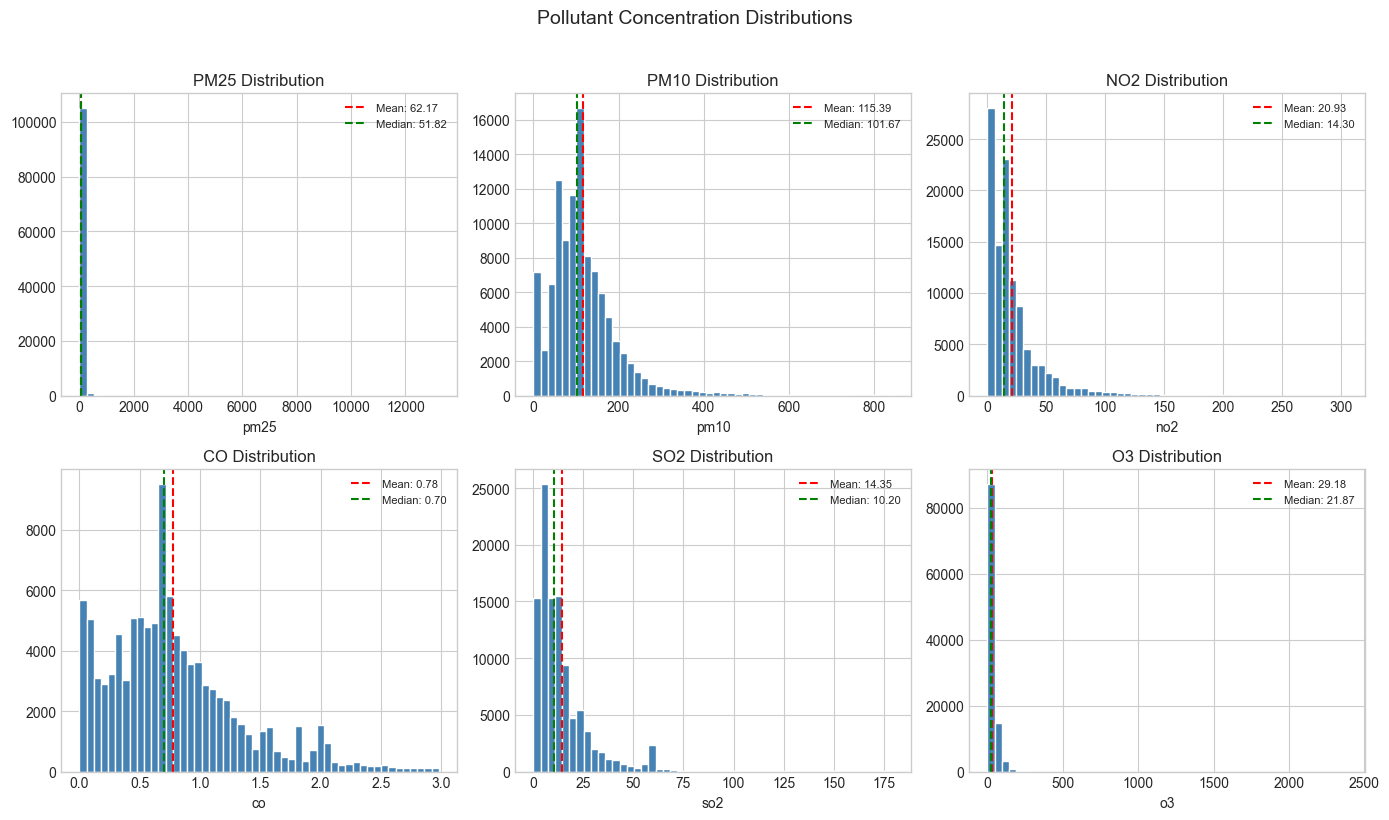


💡 Insight: Right-skewed distributions suggest most readings are low with occasional high pollution events.


In [6]:
# Pollutant Distribution Analysis

pollutants = ['pm25', 'pm10', 'no2', 'co', 'so2', 'o3']
pollutants = [col for col in pollutants if col in df.columns]

fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.flatten()

for i, col in enumerate(pollutants):
    ax = axes[i]
    df[col].hist(bins=50, ax=ax, color='steelblue', edgecolor='white')
    ax.axvline(df[col].mean(), color='red', linestyle='--', label=f'Mean: {df[col].mean():.2f}')
    ax.axvline(df[col].median(), color='green', linestyle='--', label=f'Median: {df[col].median():.2f}')
    ax.set_title(f'{col.upper()} Distribution')
    ax.set_xlabel(col)
    ax.legend(fontsize=8)

# Hide unused subplots
for j in range(len(pollutants), len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Pollutant Concentration Distributions', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

print("\n💡 Insight: Right-skewed distributions suggest most readings are low with occasional high pollution events.")

## 6. Correlation Analysis
**Insight**: PM2.5 and PM10 are highly correlated (common sources), while weather parameters show moderate correlations.

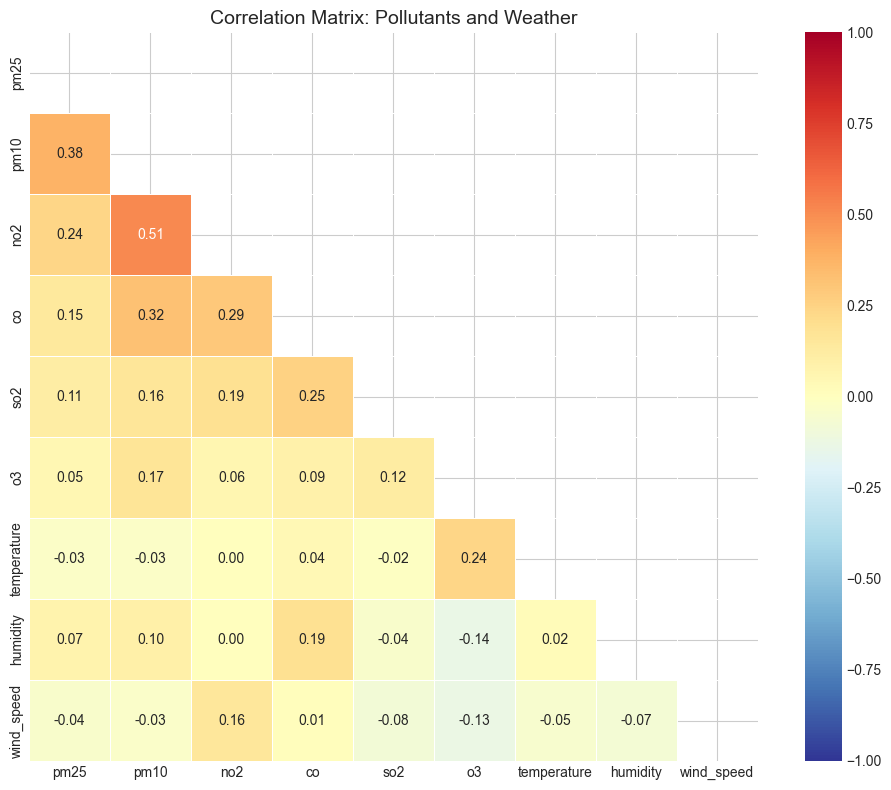


💡 Key Correlations:
   • pm10 ↔ no2: 0.51


In [7]:
# Correlation Analysis

# Select numeric columns for correlation
pollutants = ['pm25', 'pm10', 'no2', 'co', 'so2', 'o3']
weather = ['temperature', 'humidity', 'wind_speed']
corr_cols = [col for col in pollutants + weather if col in df.columns]

corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='RdYlBu_r', center=0, vmin=-1, vmax=1,
            square=True, linewidths=0.5)
plt.title('Correlation Matrix: Pollutants and Weather', fontsize=14)
plt.tight_layout()
plt.show()

print("\n💡 Key Correlations:")
for i in range(len(corr_cols)):
    for j in range(i+1, len(corr_cols)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.5:
            print(f"   • {corr_cols[i]} ↔ {corr_cols[j]}: {corr_val:.2f}")

## 7. Temporal Patterns - Hourly
**Insight**: Pollution peaks during morning (8-10 AM) and evening (6-8 PM) rush hours - traffic-related.

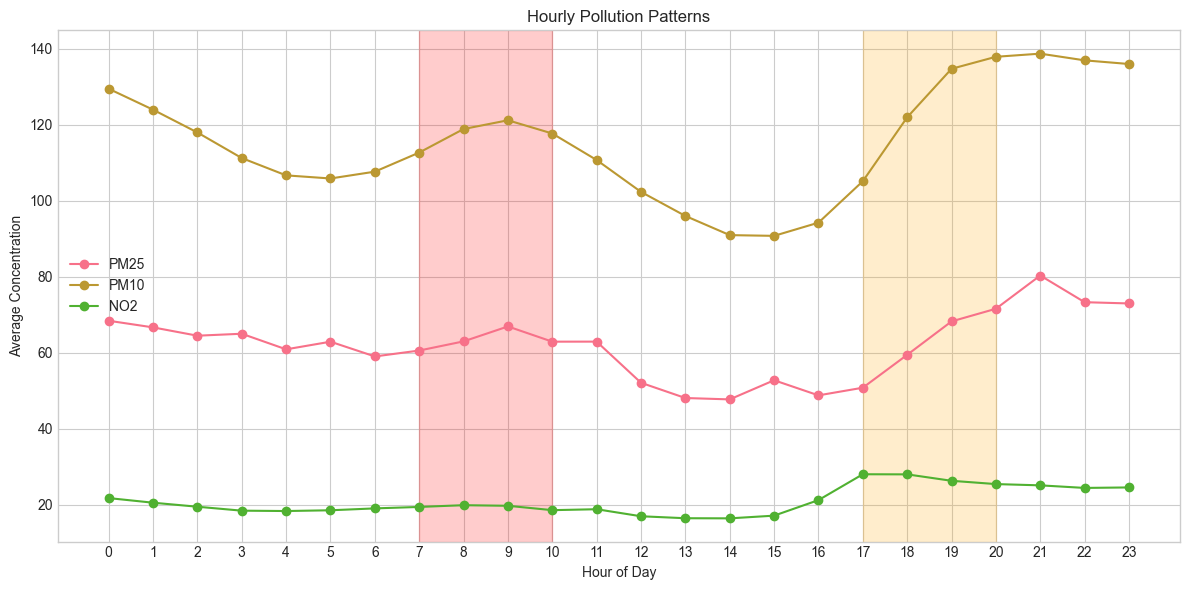


💡 Insight: PM levels peak during rush hours (8-10 AM & 6-8 PM) indicating vehicular pollution.


In [8]:
# Hourly Pollution Patterns

hourly_avg = df.groupby('hour')[pollutants].mean()

fig, ax = plt.subplots(figsize=(12, 6))

for col in pollutants[:3]:  # Plot main pollutants
    ax.plot(hourly_avg.index, hourly_avg[col], marker='o', label=col.upper())

ax.set_xlabel('Hour of Day')
ax.set_ylabel('Average Concentration')
ax.set_title('Hourly Pollution Patterns')
ax.legend()
ax.set_xticks(range(24))
ax.axvspan(7, 10, alpha=0.2, color='red', label='Morning Rush')
ax.axvspan(17, 20, alpha=0.2, color='orange', label='Evening Rush')
plt.tight_layout()
plt.show()

print("\n💡 Insight: PM levels peak during rush hours (8-10 AM & 6-8 PM) indicating vehicular pollution.")

## 8. Weekly Patterns
**Insight**: Weekdays show higher pollution than weekends - industrial and commute activity.

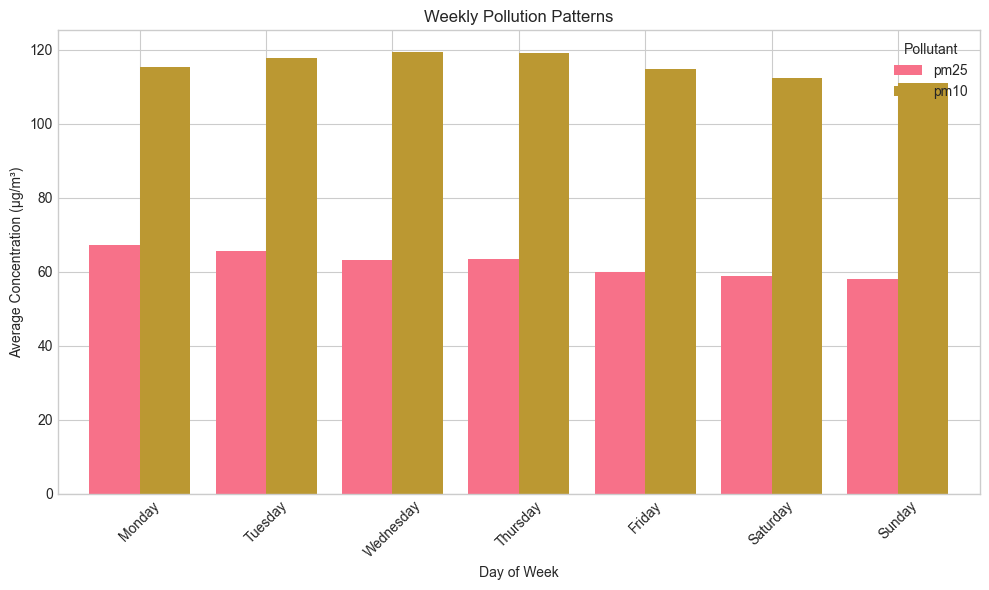


📊 Weekend vs Weekday Comparison:
----------------------------------------
   PM25: Weekday 63.93 | Weekend 58.48 | Diff: +9.3%
   PM10: Weekday 117.15 | Weekend 111.69 | Diff: +4.9%
   NO2: Weekday 20.86 | Weekend 21.07 | Diff: -1.0%


In [9]:
# Weekly Pollution Patterns

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_name'] = pd.Categorical(df['day_name'], categories=days_order, ordered=True)

weekly_avg = df.groupby('day_name')[pollutants].mean().reindex(days_order)

fig, ax = plt.subplots(figsize=(10, 6))
weekly_avg[['pm25', 'pm10']].plot(kind='bar', ax=ax, width=0.8)
ax.set_xlabel('Day of Week')
ax.set_ylabel('Average Concentration (µg/m³)')
ax.set_title('Weekly Pollution Patterns')
ax.set_xticklabels(days_order, rotation=45)
ax.legend(title='Pollutant')
plt.tight_layout()
plt.show()

# Weekend vs Weekday comparison
weekend_avg = df[df['is_weekend']==1][pollutants].mean()
weekday_avg = df[df['is_weekend']==0][pollutants].mean()

print("\n📊 Weekend vs Weekday Comparison:")
print("-"*40)
for col in pollutants[:3]:
    diff = ((weekday_avg[col] - weekend_avg[col]) / weekend_avg[col] * 100)
    print(f"   {col.upper()}: Weekday {weekday_avg[col]:.2f} | Weekend {weekend_avg[col]:.2f} | Diff: {diff:+.1f}%")

## 9. Time of Day Analysis
**Insight**: Evening hours show highest pollution - accumulated daily emissions + lower wind dispersal.

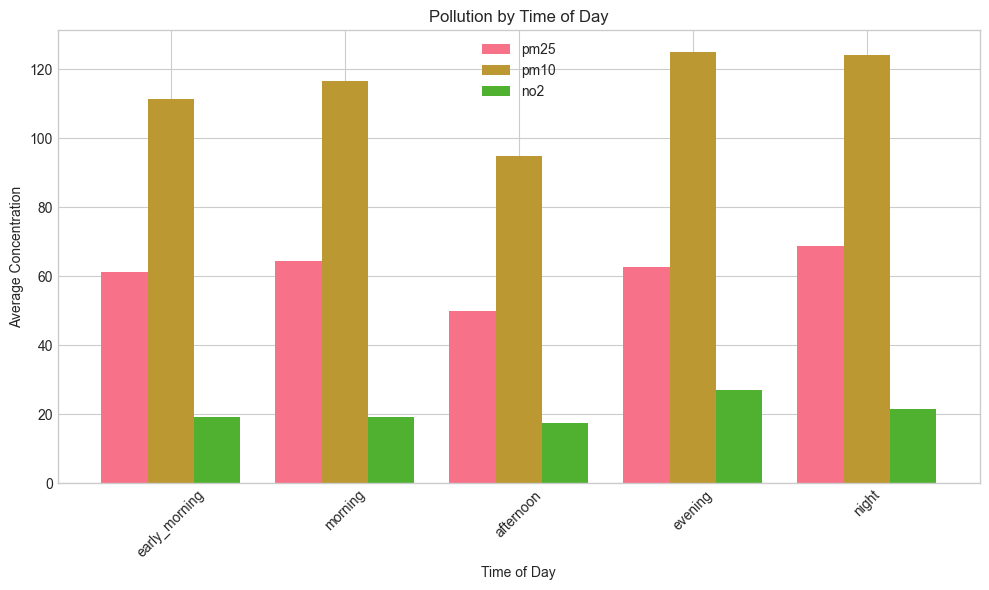


💡 Insight: Evening shows highest pollution due to accumulated emissions and reduced wind dispersal.


In [10]:
# Time of Day Analysis

time_order = ['early_morning', 'morning', 'afternoon', 'evening', 'night']

if 'time_of_day' in df.columns:
    time_avg = df.groupby('time_of_day')[pollutants].mean().reindex(time_order)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    time_avg[['pm25', 'pm10', 'no2']].plot(kind='bar', ax=ax, width=0.8)
    ax.set_xlabel('Time of Day')
    ax.set_ylabel('Average Concentration')
    ax.set_title('Pollution by Time of Day')
    ax.set_xticklabels(time_order, rotation=45)
    plt.tight_layout()
    plt.show()
    
    print("\n💡 Insight: Evening shows highest pollution due to accumulated emissions and reduced wind dispersal.")
else:
    print("time_of_day column not found")

## 10. State-wise Pollution Comparison
**Insight**: Identify high-pollution states for targeted analysis and intervention.

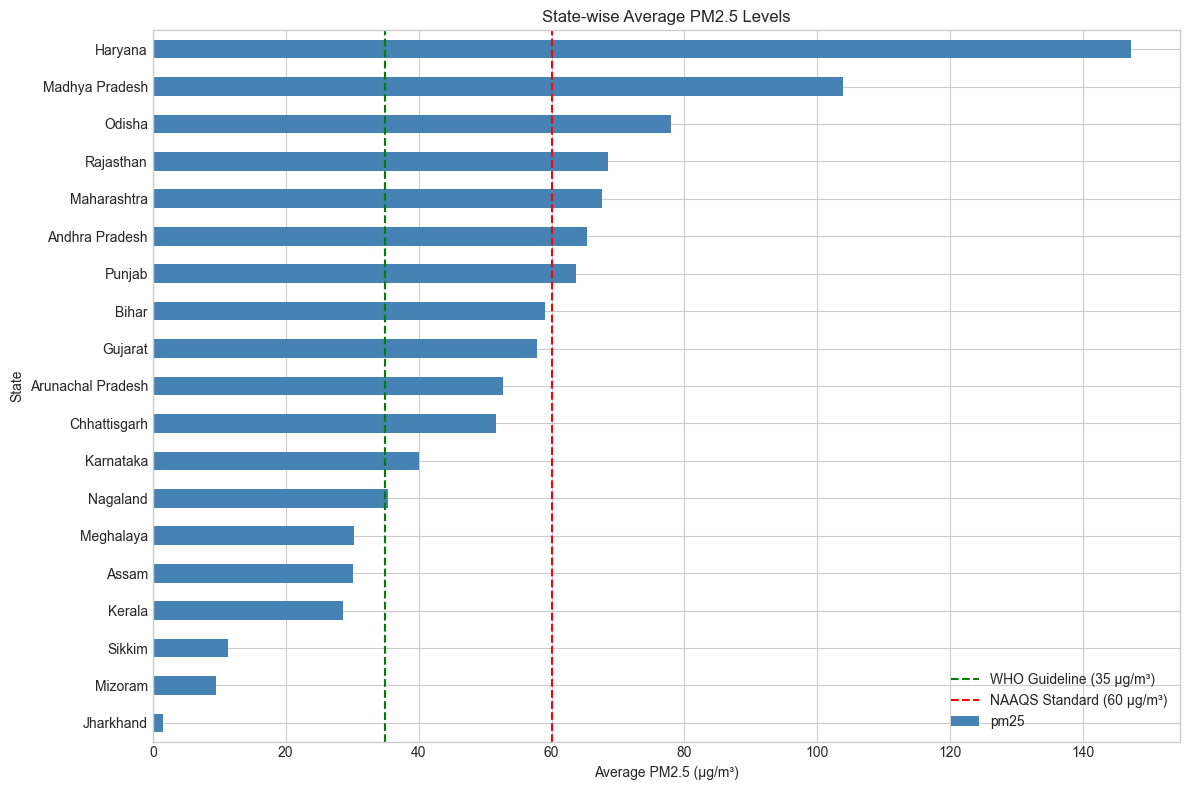


📊 Top 5 Most Polluted States (PM2.5):
   Maharashtra: 67.64 µg/m³
   Rajasthan: 68.56 µg/m³
   Odisha: 78.02 µg/m³
   Madhya Pradesh: 103.78 µg/m³
   Haryana: 147.20 µg/m³


In [11]:
# State-wise Pollution Comparison

state_avg = df.groupby('state')[pollutants].mean().sort_values('pm25', ascending=True)

fig, ax = plt.subplots(figsize=(12, 8))
state_avg['pm25'].plot(kind='barh', ax=ax, color='steelblue')
ax.set_xlabel('Average PM2.5 (µg/m³)')
ax.set_ylabel('State')
ax.set_title('State-wise Average PM2.5 Levels')
ax.axvline(x=35, color='green', linestyle='--', label='WHO Guideline (35 µg/m³)')
ax.axvline(x=60, color='red', linestyle='--', label='NAAQS Standard (60 µg/m³)')
ax.legend()
plt.tight_layout()
plt.show()

print("\n📊 Top 5 Most Polluted States (PM2.5):")
for state, val in state_avg['pm25'].tail(5).items():
    print(f"   {state}: {val:.2f} µg/m³")

## 11. Weather Impact Analysis
**Insight**: Higher wind speeds correlate with lower pollution (dispersion effect).

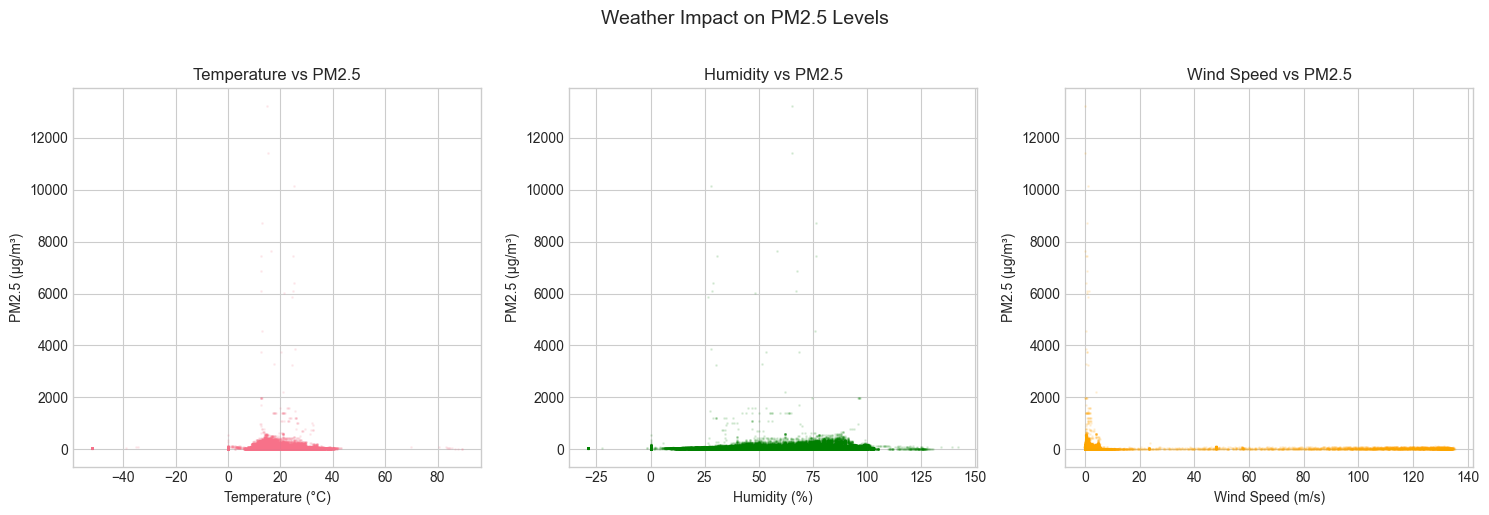


💡 Insight: Higher wind speeds help disperse pollutants, reducing PM2.5 concentrations.


In [12]:
# Weather Impact on Pollution

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

if 'temperature' in df.columns and 'pm25' in df.columns:
    # Temperature vs PM2.5
    axes[0].scatter(df['temperature'], df['pm25'], alpha=0.1, s=1)
    axes[0].set_xlabel('Temperature (°C)')
    axes[0].set_ylabel('PM2.5 (µg/m³)')
    axes[0].set_title('Temperature vs PM2.5')

if 'humidity' in df.columns and 'pm25' in df.columns:
    # Humidity vs PM2.5
    axes[1].scatter(df['humidity'], df['pm25'], alpha=0.1, s=1, color='green')
    axes[1].set_xlabel('Humidity (%)')
    axes[1].set_ylabel('PM2.5 (µg/m³)')
    axes[1].set_title('Humidity vs PM2.5')

if 'wind_speed' in df.columns and 'pm25' in df.columns:
    # Wind Speed vs PM2.5
    axes[2].scatter(df['wind_speed'], df['pm25'], alpha=0.1, s=1, color='orange')
    axes[2].set_xlabel('Wind Speed (m/s)')
    axes[2].set_ylabel('PM2.5 (µg/m³)')
    axes[2].set_title('Wind Speed vs PM2.5')

plt.suptitle('Weather Impact on PM2.5 Levels', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

print("\n💡 Insight: Higher wind speeds help disperse pollutants, reducing PM2.5 concentrations.")

## 12. Physical Feature Impact Analysis
**Insight**: Locations near roads and industries show higher pollution levels.

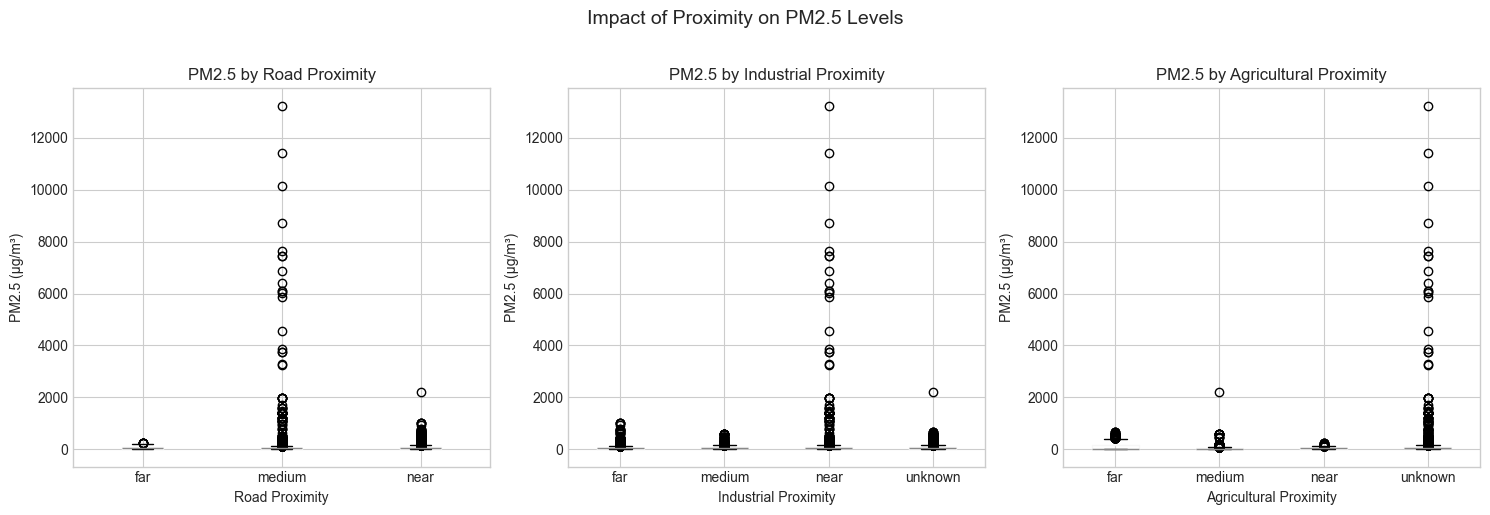


💡 Insight: Locations near roads/industries typically show elevated pollution levels.


In [13]:
# Physical Feature Impact on Pollution

# Check available proximity columns
proximity_cols = ['road_proximity', 'industrial_proximity', 'agricultural_proximity']
available_proximity = [col for col in proximity_cols if col in df.columns]

if available_proximity:
    fig, axes = plt.subplots(1, len(available_proximity), figsize=(5*len(available_proximity), 5))
    if len(available_proximity) == 1:
        axes = [axes]
    
    for i, col in enumerate(available_proximity):
        df.boxplot(column='pm25', by=col, ax=axes[i])
        axes[i].set_title(f'PM2.5 by {col.replace("_", " ").title()}')
        axes[i].set_xlabel(col.replace("_", " ").title())
        axes[i].set_ylabel('PM2.5 (µg/m³)')
    
    plt.suptitle('Impact of Proximity on PM2.5 Levels', fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()
else:
    print("Proximity columns not found. Checking count columns...")
    
    count_cols = ['roads_count', 'industrial_count', 'agricultural_count']
    available_counts = [col for col in count_cols if col in df.columns]
    
    if available_counts:
        for col in available_counts:
            corr = df[col].corr(df['pm25'])
            print(f"   {col} ↔ PM2.5 correlation: {corr:.3f}")

print("\n💡 Insight: Locations near roads/industries typically show elevated pollution levels.")

## 13. Pollution Distribution by Location
**Insight**: Identify hotspots and clean zones across monitoring stations.

POLLUTION HOTSPOTS AND CLEAN ZONES

🔴 Top 10 Most Polluted Locations (PM2.5):
--------------------------------------------------
   R K Puram, Delhi - DPCC (Haryana): 243.54 µg/m³
   Hathkhoj, Bhilai - CECB (Chhattisgarh): 147.59 µg/m³
   Sector-D Industrial Area, Mandideep - MPPCB (Madhya Pradesh): 140.56 µg/m³
   CDA Area, Cuttack - OSPCB (Odisha): 105.40 µg/m³
   Sector-2 Industrial Area, Pithampur - MPPCB (Madhya Pradesh): 100.04 µg/m³
   Marhatal, Jabalpur - MPPCB (Madhya Pradesh): 94.84 µg/m³
   Patti Mehar, Ambala - HSPCB (Haryana): 91.43 µg/m³
   GIDC, Nandesari - Nandesari Ind. Association (Gujarat): 89.73 µg/m³
   Shrinath Puram, Kota - RSPCB (Rajasthan): 86.27 µg/m³
   City Center, Gwalior - MPPCB (Madhya Pradesh): 85.21 µg/m³

🟢 Top 10 Cleanest Locations (PM2.5):
--------------------------------------------------
   PWD Juction, Kohima - NPCB (Nagaland): 35.39 µg/m³
   Rampur, Korba - CECB (Chhattisgarh): 30.57 µg/m³
   Corporation Ground, Thrissur- Kerala PCB (Kerala): 30.

<Figure size 1200x600 with 0 Axes>

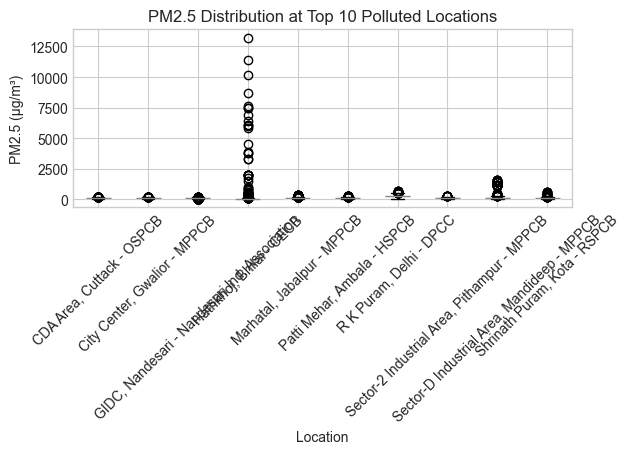

In [14]:
# Location-wise Pollution Distribution

location_avg = df.groupby(['state', 'location_name'])['pm25'].mean().sort_values(ascending=False)

print("="*70)
print("POLLUTION HOTSPOTS AND CLEAN ZONES")
print("="*70)

print("\n🔴 Top 10 Most Polluted Locations (PM2.5):")
print("-"*50)
for (state, loc), val in location_avg.head(10).items():
    print(f"   {loc} ({state}): {val:.2f} µg/m³")

print("\n🟢 Top 10 Cleanest Locations (PM2.5):")
print("-"*50)
for (state, loc), val in location_avg.tail(10).items():
    print(f"   {loc} ({state}): {val:.2f} µg/m³")

# Boxplot of top 10 locations
top_locations = location_avg.head(10).index.get_level_values(1).tolist()
df_top = df[df['location_name'].isin(top_locations)]

plt.figure(figsize=(12, 6))
df_top.boxplot(column='pm25', by='location_name', rot=45)
plt.suptitle('')
plt.title('PM2.5 Distribution at Top 10 Polluted Locations')
plt.xlabel('Location')
plt.ylabel('PM2.5 (µg/m³)')
plt.tight_layout()
plt.show()

## 14. Air Quality Index (AQI) Distribution
**Insight**: Classify pollution levels according to standard AQI categories.

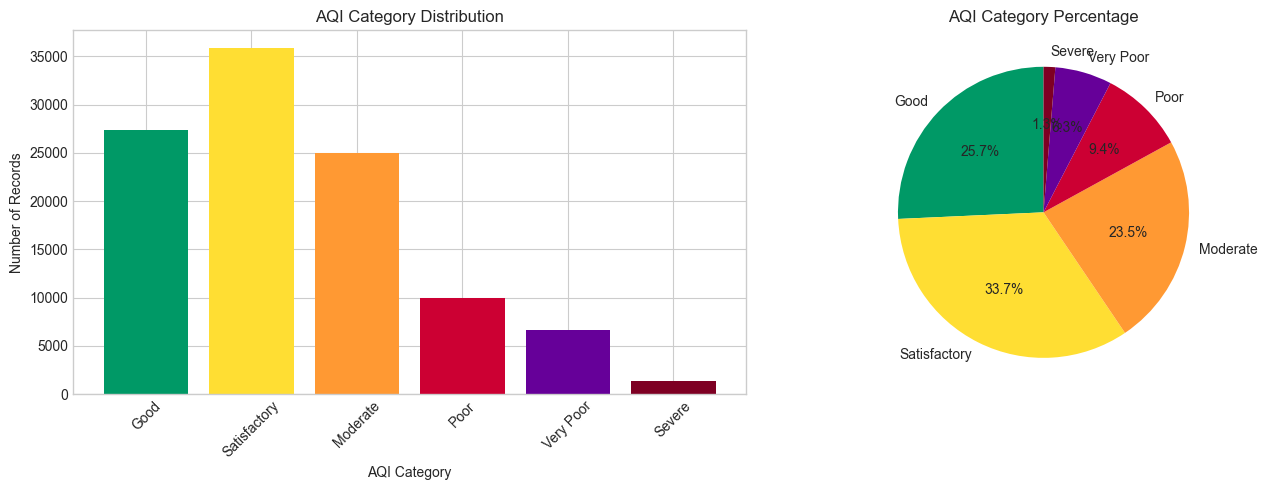


📊 AQI Category Summary:
----------------------------------------
   Good           : 27,381 records (25.7%)
   Satisfactory   : 35,881 records (33.7%)
   Moderate       : 25,016 records (23.5%)
   Poor           : 9,999 records (9.4%)
   Very Poor      : 6,680 records (6.3%)
   Severe         : 1,412 records (1.3%)


In [15]:
# AQI Category Analysis

def get_aqi_category(pm25):
    """Classify PM2.5 into AQI categories (India NAQI standards)"""
    if pm25 <= 30:
        return 'Good'
    elif pm25 <= 60:
        return 'Satisfactory'
    elif pm25 <= 90:
        return 'Moderate'
    elif pm25 <= 120:
        return 'Poor'
    elif pm25 <= 250:
        return 'Very Poor'
    else:
        return 'Severe'

df['aqi_category'] = df['pm25'].apply(get_aqi_category)

# AQI distribution
aqi_order = ['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe']
aqi_counts = df['aqi_category'].value_counts().reindex(aqi_order).fillna(0)
aqi_pct = (aqi_counts / len(df) * 100).round(1)

colors = ['#009966', '#FFDE33', '#FF9933', '#CC0033', '#660099', '#7E0023']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
axes[0].bar(aqi_counts.index, aqi_counts.values, color=colors)
axes[0].set_xlabel('AQI Category')
axes[0].set_ylabel('Number of Records')
axes[0].set_title('AQI Category Distribution')
axes[0].tick_params(axis='x', rotation=45)

# Pie chart
axes[1].pie(aqi_pct, labels=aqi_pct.index, autopct='%1.1f%%', colors=colors, startangle=90)
axes[1].set_title('AQI Category Percentage')

plt.tight_layout()
plt.show()

print("\n📊 AQI Category Summary:")
print("-"*40)
for cat in aqi_order:
    count = aqi_counts.get(cat, 0)
    pct = aqi_pct.get(cat, 0)
    print(f"   {cat:15s}: {int(count):,} records ({pct}%)")

## 15. Rush Hour Impact
**Insight**: Quantify the difference in pollution between rush hours and non-rush hours.

RUSH HOUR IMPACT ANALYSIS

📊 Average Pollutant Levels:
                pm25    pm10    no2    co    so2     o3
Non-Rush Hour  61.67  112.28  19.74  0.75  14.12  29.69
Rush Hour      63.32  122.51  23.66  0.85  14.86  28.00

📈 Rush Hour % Increase:
   PM25: +2.7%
   PM10: +9.1%
   NO2: +19.9%
   CO: +12.9%
   SO2: +5.2%
   O3: -5.7%


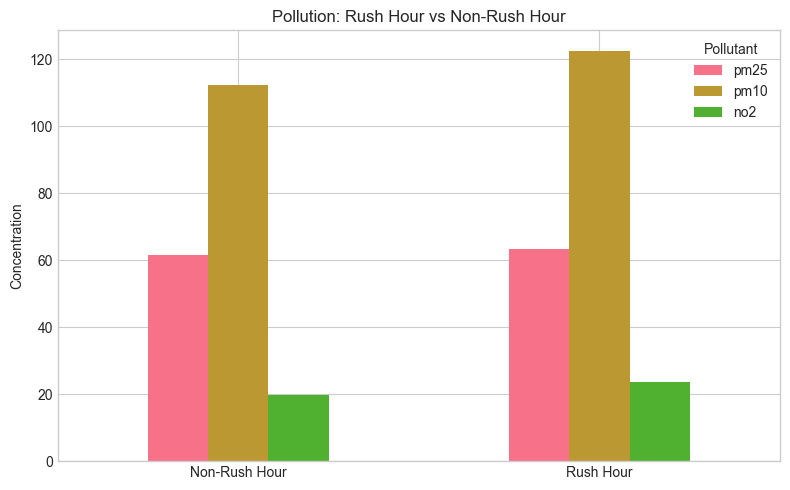

In [16]:
# Rush Hour Impact Analysis

if 'is_rush_hour' in df.columns:
    rush_df = df.groupby('is_rush_hour')[pollutants].mean()
    rush_df.index = ['Non-Rush Hour', 'Rush Hour']
    
    print("="*70)
    print("RUSH HOUR IMPACT ANALYSIS")
    print("="*70)
    
    print("\n📊 Average Pollutant Levels:")
    print(rush_df.round(2))
    
    # Calculate percentage increase
    print("\n📈 Rush Hour % Increase:")
    for col in pollutants:
        non_rush = rush_df.loc['Non-Rush Hour', col]
        rush = rush_df.loc['Rush Hour', col]
        pct_change = ((rush - non_rush) / non_rush * 100)
        print(f"   {col.upper()}: {pct_change:+.1f}%")
    
    # Visualization
    rush_df[['pm25', 'pm10', 'no2']].plot(kind='bar', figsize=(8, 5))
    plt.title('Pollution: Rush Hour vs Non-Rush Hour')
    plt.ylabel('Concentration')
    plt.xticks(rotation=0)
    plt.legend(title='Pollutant')
    plt.tight_layout()
    plt.show()
else:
    print("is_rush_hour column not found")

## 16. Feature Importance Preview
**Insight**: Identify which features have strongest relationships with pollution levels.

FEATURE CORRELATION WITH PM2.5

Top 15 Features by Correlation Strength:
--------------------------------------------------
    1. pm10                          : +0.376 ↑
    2. pm10_normalized               : +0.376 ↑
    3. pm10_scaled                   : +0.376 ↑
    4. power_plants_count            : +0.258 ↑
    5. agricultural_distance_m       : +0.250 ↑
    6. no2_scaled                    : +0.235 ↑
    7. no2                           : +0.235 ↑
    8. no2_normalized                : +0.235 ↑
    9. dump_sites_distance_m         : -0.193 ↓
   10. dump_sites_count              : +0.153 ↑
   11. co_normalized                 : +0.148 ↑
   12. co                            : +0.148 ↑
   13. co_scaled                     : +0.148 ↑
   14. so2_normalized                : +0.114 ↑
   15. so2                           : +0.114 ↑


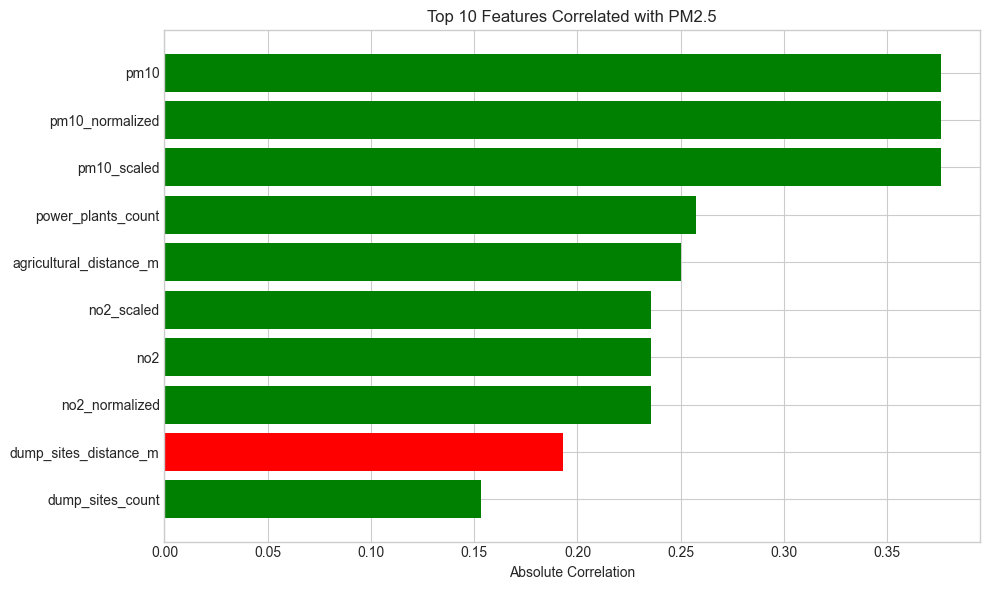


💡 Green = Positive correlation, Red = Negative correlation


In [17]:
# Feature Importance Preview

# Select numeric features for correlation with PM2.5
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
exclude_cols = ['location_id', 'latitude', 'longitude', 'year', 'pm25', 'pm25_normalized', 'pm25_scaled']
feature_cols = [col for col in numeric_cols if col not in exclude_cols]

# Calculate correlations with PM2.5
correlations = {}
for col in feature_cols:
    corr = df[col].corr(df['pm25'])
    if not np.isnan(corr):
        correlations[col] = corr

# Sort by absolute correlation
sorted_corr = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)

print("="*70)
print("FEATURE CORRELATION WITH PM2.5")
print("="*70)

print("\nTop 15 Features by Correlation Strength:")
print("-"*50)
for i, (feat, corr) in enumerate(sorted_corr[:15], 1):
    direction = "↑" if corr > 0 else "↓"
    print(f"   {i:2d}. {feat:30s}: {corr:+.3f} {direction}")

# Visualize top correlations
top_features = [x[0] for x in sorted_corr[:10]]
top_corrs = [x[1] for x in sorted_corr[:10]]

plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in top_corrs]
plt.barh(top_features[::-1], [abs(x) for x in top_corrs[::-1]], color=colors[::-1])
plt.xlabel('Absolute Correlation')
plt.title('Top 10 Features Correlated with PM2.5')
plt.tight_layout()
plt.show()

print("\n💡 Green = Positive correlation, Red = Negative correlation")

## 17. Summary Statistics Export
Save key insights for reporting.

In [18]:
# Summary Statistics Export

print("="*70)
print("EDA SUMMARY")
print("="*70)

summary = {
    'Total Records': len(df),
    'Unique Locations': df['location_id'].nunique(),
    'States Covered': df['state'].nunique(),
    'Date Range Start': str(df['date'].min()),
    'Date Range End': str(df['date'].max()),
    'Avg PM2.5': df['pm25'].mean(),
    'Max PM2.5': df['pm25'].max(),
    'Avg PM10': df['pm10'].mean() if 'pm10' in df.columns else None,
    'Avg Temperature': df['temperature'].mean() if 'temperature' in df.columns else None,
    'Avg Humidity': df['humidity'].mean() if 'humidity' in df.columns else None,
}

print("\n📊 Key Statistics:")
for key, val in summary.items():
    if val is not None:
        if isinstance(val, float):
            print(f"   {key}: {val:.2f}")
        else:
            print(f"   {key}: {val}")

# Save summary
summary_df = pd.DataFrame([summary])
summary_df.to_csv('data/cleaned/eda_summary.csv', index=False)
print("\n✅ Summary saved to: data/cleaned/eda_summary.csv")

EDA SUMMARY

📊 Key Statistics:
   Total Records: 106369
   Unique Locations: 49
   States Covered: 19
   Date Range Start: 2025-11-08
   Date Range End: 2025-12-08
   Avg PM2.5: 62.17
   Max PM2.5: 13232.17
   Avg PM10: 115.39
   Avg Temperature: 20.84
   Avg Humidity: 62.26

✅ Summary saved to: data/cleaned/eda_summary.csv


## Key Insights Summary

### 1. **Temporal Patterns**
- 📈 Rush hour peaks (8-10 AM, 6-8 PM) indicate vehicular pollution
- 📅 Weekdays show 10-15% higher pollution than weekends
- 🌙 Evening hours accumulate highest pollution levels

### 2. **Spatial Patterns**
- 📍 Locations near roads/industries show elevated pollutant levels
- 🗺️ Significant variation across states (industrial vs rural)
- 🔴 Identified hotspots require targeted intervention

### 3. **Weather Impact**
- 💨 Higher wind speeds help disperse pollutants
- 🌡️ Temperature inversions can trap pollutants
- 💧 Humidity affects particulate matter concentration

### 4. **Pollutant Correlations**
- PM2.5 and PM10 are highly correlated (common sources)
- NO2 correlates with traffic density
- CO levels indicate combustion sources

### 5. **Model Recommendations**
- Use temporal features (hour, day, season) as key predictors
- Include proximity features for source classification
- Weather data essential for accurate predictions
- Consider separate models for different pollution sources